In [12]:
from requests import request
import pandas as pd

In [9]:
# curl -X 'GET' \|
#   'https://wikimedia.org/api/rest_v1/metrics/pageviews/top-per-country/US/all-access/2022/11/05' \
#   -H 'accept: application/json'

headers = {'accept': 'application/json',
          'User-Agent': 'youremail@gmail.com'}

In [53]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/top-per-country/US/all-access/2023/05/18"
r = request("get", url,headers=headers)

df = pd.json_normalize(r.json()['items'][0]['articles'])

In [54]:
df.head()

,article,project,views_ceil,rank
0,Main_Page,en.wikipedia,1826500,1
1,Cookie_(informatique),fr.wikipedia,1579100,2
2,Main_Page,commons.wikimedia,563400,3
3,Special:Search,en.wikipedia,516800,4
4,Bishop_Briggs,en.wikipedia,171400,5


In [55]:
# df.sort_values(by='views_ceil', ascending=False)

# df.filter(regex = "^en.*", axis="rows")

# df.project.str.match('^en.*')
df2 = df.loc[(~df.article.str.match('.*:.*')) & df.project.str.match('^en.*'),: ]
df2 = df2.sort_values(by='views_ceil', ascending=False)
df2 = df2[df2.article != 'Main_Page']
df2.head()

,article,project,views_ceil,rank
4,Bishop_Briggs,en.wikipedia,171400,5
10,Superstar_Billy_Graham,en.wikipedia,90700,11
11,Jimmy_Butler,en.wikipedia,88800,12
12,Killers_of_the_Flower_Moon_(film),en.wikipedia,83700,13
14,Anna_Nicole_Smith,en.wikipedia,82300,15


In [56]:
top_five = df2.article.values[:5]
print(top_five)

['Bishop_Briggs' 'Superstar_Billy_Graham' 'Jimmy_Butler'
 'Killers_of_the_Flower_Moon_(film)' 'Anna_Nicole_Smith']


In [45]:
def get_a_months_data(article=None):
    url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{article}/daily/{a_month_ago.strftime("%Y%m%d")}/{yesterday.strftime("%Y%m%d")}'
    r = requests.get(url, allow_redirects=False, headers={'User-Agent': 'youremail@gmail.com'})
    df = pd.json_normalize(r.json()["items"])
    return df[['article','timestamp','views']]

In [49]:
from datetime import datetime, timedelta

yesterday = datetime.now() - timedelta(1)
a_month_ago = yesterday - timedelta(7)
year = yesterday.year
month = yesterday.month
day = yesterday.day
date_string = yesterday.strftime("%Y%m%d")

In [57]:
all_tables = pd.DataFrame(columns = ['article','timestamp','views'])

for article in top_five:
	df = get_a_months_data(article=article)
	all_tables = pd.concat([all_tables, df])

all_tables.to_csv("all_tables.csv", index=False)
all_tables.head()

,article,timestamp,views
0,Bishop_Briggs,2023051100,26074
1,Bishop_Briggs,2023051200,8933
2,Bishop_Briggs,2023051300,5058
3,Bishop_Briggs,2023051400,3417
4,Bishop_Briggs,2023051500,2661


In [58]:
## Get Data

from requests import request
import pandas as pd
from datetime import datetime, timedelta

# yesterday = datetime.now() - timedelta(1)

headers = {'accept': 'application/json',
          'User-Agent': 'youremail@gmail.com'}


def get_top_n_trending(n=5, day=None):
    """
    Retrieves the top N trending articles from the Wikimedia pageviews API.

    Parameters:
        n (int): The number of top articles to retrieve. Default is 5.
        day (datetime): The specific day for which to retrieve trending articles. 
                        If not provided, the previous day is used.

    Returns:
        numpy.ndarray: An array containing the top N trending article titles.

    """

    if day is None:
        day = datetime.now() - timedelta(1)
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/top-per-country/US/all-access/{day.strftime('%Y/%m/%d')}"
    r = request("get", url, headers=headers)
    df = pd.json_normalize(r.json()['items'][0]['articles'])

    filtered_df = df.loc[(~df.article.str.match('.*:.*')) & df.project.str.match('^en.*'), :]
    filtered_df = filtered_df.sort_values(by='views_ceil', ascending=False)
    filtered_df = filtered_df[filtered_df.article != 'Main_Page']
    return filtered_df.article.values[:n]


def get_a_weeks_data(article=None, day=None):
    """
    Retrieves a week's worth of data for a specific article from the Wikimedia pageviews API.

    Parameters:
        article (str): The title of the article for which to retrieve data.
        day (datetime): The specific day for which to retrieve data. 
                        If not provided, the previous day is used.

    Returns:
        pandas.DataFrame: A DataFrame containing the article title, timestamp, and views for each day.

    """

    if day is None:
        day = datetime.now() - timedelta(days=1)
    a_week_ago = day - timedelta(days=7)
    url = f'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/{article}/daily/{a_week_ago.strftime("%Y%m%d")}/{day.strftime("%Y%m%d")}'
    response = request("get", url, headers=headers)
    data = response.json()

    df = pd.json_normalize(data["items"])
    return df[['article', 'timestamp', 'views']]


def create_table(articles):
    """
    Creates a table by retrieving a week's worth of data for a list of articles from the Wikimedia pageviews API.

    Parameters:
        articles (list): A list of article titles for which to retrieve data.

    Returns:
        pandas.DataFrame: A DataFrame containing the combined data for all articles, including the article title, timestamp, and views for each day.

    """
    all_tables = []
    
    for article in articles:
        df = get_a_weeks_data(article=article)
        all_tables.append(df)
    
    return pd.concat(all_tables, ignore_index=True)


df = create_table(articles=get_top_n_trending())
df.head()

,article,timestamp,views
0,Jim_Brown,2023051200,1782
1,Jim_Brown,2023051300,1625
2,Jim_Brown,2023051400,1536
3,Jim_Brown,2023051500,1309
4,Jim_Brown,2023051600,1481


In [56]:
df

,article,timestamp,views
0,Jim_Brown,2023051200,1782
1,Jim_Brown,2023051300,1625
2,Jim_Brown,2023051400,1536
3,Jim_Brown,2023051500,1309
4,Jim_Brown,2023051600,1481
5,Jim_Brown,2023051700,1449
6,Jim_Brown,2023051800,1593
7,Jim_Brown,2023051900,379325
8,Rui_Hachimura,2023051200,3353
9,Rui_Hachimura,2023051300,26617


['Bishop_Briggs' 'Superstar_Billy_Graham' 'Jimmy_Butler'
 'Killers_of_the_Flower_Moon_(film)' 'Anna_Nicole_Smith']


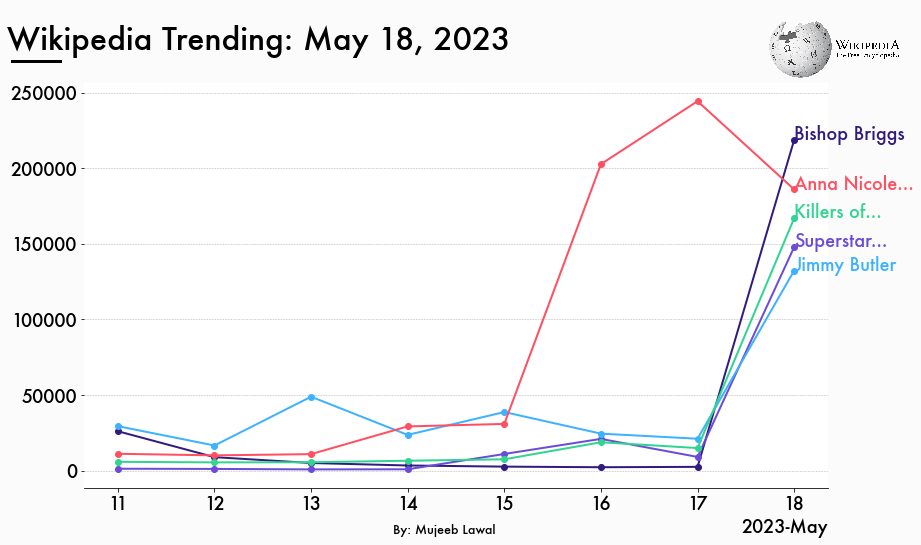

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as lines
from datetime import datetime, timedelta

import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from textwrap import shorten

yesterday = datetime.now() - timedelta(1)
date_string = yesterday.strftime("%b %d, %Y")

# Preset
IMAGE = image.imread("Wikipedia-Emblem.png")

plt.rcParams['font.size']=18
plt.rcParams['font.family']="Futura"

fig = plt.figure(figsize=[13.333, 7.5])
ab = AnnotationBbox(OffsetImage(IMAGE, zoom=0.035),(0.8, 0.85),xycoords='figure fraction',
	box_alignment = (0,0),pad=0, frameon=False)
fig.add_artist(ab)
fig.add_artist(lines.Line2D([0.05, 0.1], [0.89, 0.89], c="black", linewidth=3))

fig.set_facecolor("#FBFBFB")
caption = f"Wikipedia Trending: {date_string}"
fig.text(0.045, 0.91, caption, fontsize="xx-large", ha="left", va="baseline", fontweight="bold")

fig.text(0.5, 0.015, "By: Mujeeb Lawal", fontsize="x-small", ha="center", va="baseline")



df = pd.read_csv("all_tables.csv")
df['timestamp'] = (df.timestamp/100).astype(int)
df['timestamp'] = pd.to_datetime(df.timestamp, format="%Y%m%d")



ax = fig.add_subplot()
fig.subplots_adjust(bottom=0.1, top=0.85)

articles = df.article.unique()
print(articles)
colors = ['#311B7E', '#6B4CD9', '#3DB2FF', '#31D490', '#FF4F61']
df1 = df[df.article==articles[0]]
# ax.plot_date(df1.timestamp, df1.views, linestyle='solid', color='#311B7E')

for article, color in zip(articles, colors):
	sub_df = df[df.article==article]
	name = shorten(article.replace("_"," "), width=15, placeholder="...")
	ax.plot_date(sub_df.timestamp, sub_df.views, linestyle='solid', color=color, linewidth=2)
	ax.text(sub_df.timestamp.values[-1], sub_df.views.values[-1], f'{name}', color=color, ha='left')

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.savefig("test2.png")

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.lines as lines
from datetime import datetime, timedelta

import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from textwrap import shorten, wrap

yesterday = datetime.now() - timedelta(1)
date_string = yesterday.strftime("%b %d, %Y")

# Preset
IMAGE = image.imread("Wikipedia-Emblem.png")

plt.rcParams['font.size']=18
plt.rcParams['font.family']="Futura"

fig = plt.figure(figsize=[13.333, 7.5])
ab = AnnotationBbox(OffsetImage(IMAGE, zoom=0.035),(0.8, 0.85),xycoords='figure fraction',
	box_alignment = (0,0),pad=0, frameon=False)
fig.add_artist(ab)
fig.add_artist(lines.Line2D([0.05, 0.1], [0.89, 0.89], c="black", linewidth=3))

fig.set_facecolor("#FBFBFB")
caption = f"Wikipedia Trending: {date_string}"
fig.text(0.045, 0.91, caption, fontsize="xx-large", ha="left", va="baseline", fontweight="bold")

fig.text(0.1, 0.75, "Topic", fontsize="x-large", ha="left", va="baseline", fontweight="bold")

fig.text(0.5, 0.015, "By: Mujeeb Lawal", fontsize="x-small", ha="center", va="baseline")


text = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries,
"""

IMAGE2 = image.imread("image2.jpg")
ab = AnnotationBbox(OffsetImage(IMAGE2),(0.1, 0.3),xycoords='figure fraction',
	box_alignment = (0,0),pad=0, frameon=False)
fig.add_artist(ab)

fig.text(0.4, 0.4, '\n'.join(wrap(text)), fontsize="small", ha="left", va="baseline")

plt.savefig("test2.png")
# plt.show()

<Figure size 1333.3x750 with 0 Axes>

In [36]:
# Putting it all in a function to generate a page given an image, text and heading

# Create Base Image Class

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.patches as patches
import matplotlib.lines as lines
import numpy as np
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime, timedelta

plt.rcParams['font.size']=18
plt.rcParams['font.family']="Futura"
plt.rcParams.update({'figure.max_open_warning': 0})

class Base(Figure):

    def __init__(self,*args, **kwargs):
        super().__init__(*args, **kwargs)
        
        yesterday = datetime.now() - timedelta(1)
        date_string = yesterday.strftime("%b %d, %Y")

        IMAGE = image.imread("Wikipedia-Emblem.png")
        ab = AnnotationBbox(OffsetImage(IMAGE, zoom=0.035),(0.8, 0.85),xycoords='figure fraction',
            box_alignment = (0,0),pad=0, frameon=False)
        self.add_artist(ab)
        self.add_artist(lines.Line2D([0.05, 0.1], [0.89, 0.89], c="black", linewidth=3))

        self.subplots_adjust(bottom=0.1, top=0.85)
        self.set_size_inches(13.333,7.5)
        self.set_facecolor("#FBFBFB")
        
        caption = f"Wikipedia Trending: {date_string}"
        self.text(0.045, 0.91, caption, fontsize="xx-large", ha="left", va="baseline", fontweight="bold")
        self.text(0.5, 0.015, "By: Mujeeb Lawal", fontsize="x-small", ha="center", va="baseline")

class DocGenerator(Base):
    
    def __init__(self, *args, image_path, text, heading, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.text(0.1, 0.75, heading, fontsize="x-large", ha="left", va="baseline", fontweight="bold")
        
        IMAGE2 = image.imread(image_path)
        ab = AnnotationBbox(OffsetImage(IMAGE2),(0.1, 0.3),xycoords='figure fraction',
            box_alignment = (0,0),pad=0, frameon=False)
        self.add_artist(ab)
        
        self.text(0.4, 0.4, '\n'.join(wrap(text)), fontsize="small", ha="left", va="baseline")


In [33]:
text = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries,
"""

fig = plt.figure(FigureClass=DocGenerator, image_path="Bishop_Briggs_2.jpg", text=text, heading="Header")
fig.savefig("class_generated.pdf")
# ax = fig.add_subplot()

<DocGenerator size 1333.3x750 with 0 Axes>

In [35]:
my_fig = DocGenerator(image_path="Bishop_Briggs_2.jpg", text=text, heading="Header")
my_fig.save_fig("class_generated.pdf")

0     20230512
1     20230513
2     20230514
3     20230515
4     20230516
5     20230517
6     20230518
7     20230519
8     20230512
9     20230513
10    20230514
11    20230515
12    20230516
13    20230517
14    20230518
15    20230519
16    20230512
17    20230513
18    20230514
19    20230515
20    20230516
21    20230517
22    20230518
23    20230519
24    20230512
25    20230513
26    20230514
27    20230515
28    20230516
29    20230517
30    20230518
31    20230519
32    20230512
33    20230513
34    20230514
35    20230515
36    20230516
37    20230517
38    20230518
39    20230519
Name: timestamp, dtype: object

['Jim_Brown' 'Rui_Hachimura' 'Fast_X' 'Jamal_Murray' 'Nikola_Jokić']


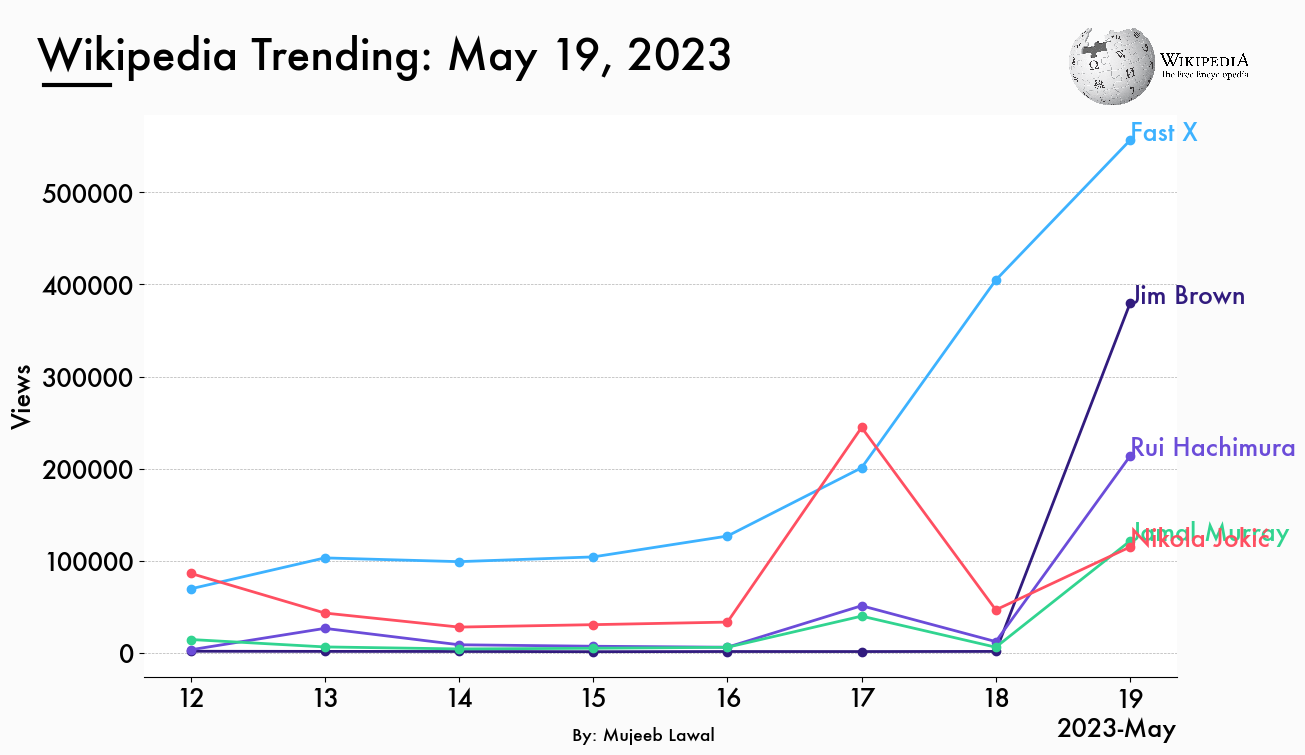

In [64]:
## Generate Chart Using Base Class

# df = pd.read_csv("all_tables.csv")
# df['timestamp'] = (df.timestamp/100).astype(int)
df['timestamp'] = pd.to_datetime(df.timestamp.str.removesuffix('00'), format="%Y%m%d")


fig = plt.figure(FigureClass=Base)
ax = fig.add_subplot()
fig.subplots_adjust(bottom=0.1, top=0.85)

articles = df.article.unique()
# print(articles)
colors = ['#311B7E', '#6B4CD9', '#3DB2FF', '#31D490', '#FF4F61']
df1 = df[df.article==articles[0]]
# ax.plot_date(df1.timestamp, df1.views, linestyle='solid', color='#311B7E')

for article, color in zip(articles, colors):
	sub_df = df[df.article==article]
	name = shorten(article.replace("_"," "), width=15, placeholder="...")
	ax.plot_date(sub_df.timestamp, sub_df.views, linestyle='solid', color=color, linewidth=2)
	ax.text(sub_df.timestamp.values[-1], sub_df.views.values[-1], f'{name}', color=color, ha='left')

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

ax.set_ylabel('Views')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.savefig("class_gen_chart.png")

